In [88]:
import pyart
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Helper

In [154]:
def xyr2bbox(x, y, r):
    xy = np.array((x - r, y - r))
    w = 2*r
    h = 2*r
    return xy, w, h

# Read data

* Bounding boxes are in *image coordinates* for 600x600 map image

In [118]:
from wsrlib import read_s3, radar2mat

scan, im_x, im_y, im_r = 'KBUF20160826_101937_V06', 235.294551, 278.52, 26.456692
scan, im_x, im_y, im_r = 'KBUF20160826_103825_V06', 64.915009, 390.60, 52.056629

radar = read_s3(scan)

# Working in pixel units

## Option 1: `ydirection='xy'` (default)

* Set origin='lower' in imshow
* Flip bounding box y coordinate to match

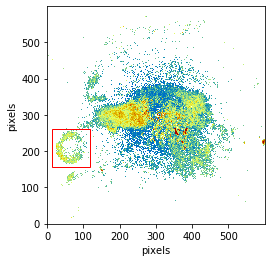

In [177]:
data, fields, elev, y, x = radar2mat(radar,
                                     coords='cartesian',
                                     dim=600, 
                                     r_max=150000)

plt.imshow(data[0,0,:,:],
           origin='lower', 
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

# get bbox from x, y, r
xy, w, h = xyr2bbox(im_x, 600 - im_y, im_r) # flip y-coordinate of bounding box

# plot
rect = patches.Rectangle(xy, w, h, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.show()

This data array is compatible with multi-dimensional interpolation

In [115]:
from scipy.interpolate import interp1d, RegularGridInterpolator
f = RegularGridInterpolator((elev, y, x), data[0,...])

## Option 2: `ydirection='ij'`
* Use `origin='upper'` in imshow (the default)
* Use bounding box as is

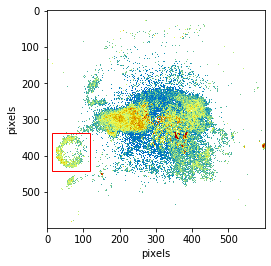

In [171]:
data, fields, elev, y, x = radar2mat(radar,
                                     coords='cartesian',
                                     ydirection='ij',
                                     dim=600, 
                                     r_max=150000)

# View one sweep: reflectivity at lowest elevation
plt.imshow(data[0,0,:,:],
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

# get bbox from x, y, r
xy, w, h = xyr2bbox(im_x, im_y, im_r)

# plot
rect = patches.Rectangle( xy, w, h, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.show()

This data array is **not compatible** with multi-dimensional interpolation

In [152]:
from scipy.interpolate import interp1d, RegularGridInterpolator
f = RegularGridInterpolator((elev, y, x), data[0,...])

ValueError: The points in dimension 1 must be strictly ascending

# Working in map units

In [176]:
def image2xy(im_x, im_y, im_r, dim=600, rmax=150000):
    '''
    Convert from image coordinates to (x,y) coordinates offset from radar
    '''
    
    x0 = y0 = dim/2.0 # origin
    x =  (im_x - x0)*2*rmax/dim
    y = -(im_y - y0)*2*rmax/dim  # flip y direction here
    r = im_r * 2 * rmax/dim
    
    return x, y, r

## Option 1: `ydirection='xy'` (default)
* Set origin = 'lower' in imshow
* Set extent like (x[0], x[-1], y[0], y[-1))
* Convert bounding box to xy coordinates

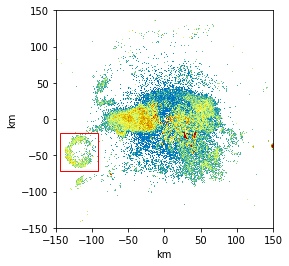

In [173]:
data, fields, elev, y, x = radar2mat(radar,
                                     coords='cartesian',
                                     dim=600, 
                                     r_max=150000)

# View one sweep: reflectivity at lowest elevation
plt.imshow(data[0,0,:,:],
           origin = 'lower',
           extent = (x[0]/1000, x[-1]/1000, y[0]/1000, y[-1]/1000),
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

# Convert roost to image coordinates
roost_x, roost_y, roost_r = image2xy(im_x, im_y, im_r)

# get bbox from x, y, r
corner, w, h = xyr2bbox(roost_x, roost_y, roost_r)

# plot
rect = patches.Rectangle( corner/1000, w/1000, h/1000, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.xlabel('km')
plt.ylabel('km')
plt.show()


## Option 1: `ydirection='ij'`
* Set origin = 'upper' in imshow
* Set extent like (x[0], x[-1], y[-1], y[0))
* Convert bounding box to xy coordinates

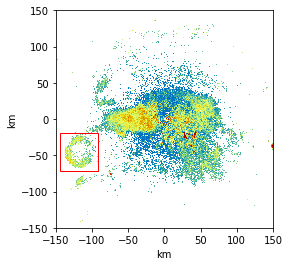

In [174]:
data, fields, elev, y, x = radar2mat(radar,
                                     coords='cartesian',
                                     ydirection='ij',
                                     dim=600, 
                                     r_max=150000)

# View one sweep: reflectivity at lowest elevation
plt.imshow(data[0,0,:,:],
           extent = (x[0]/1000, x[-1]/1000, y[-1]/1000, y[0]/1000),
           origin = 'upper',
           vmin=-5, vmax=35,
           cmap=pyart.config.get_field_colormap('reflectivity'))

# Convert roost to image coordinates
roost_x, roost_y, roost_r = image2xy(im_x, im_y, im_r)

# get bbox from x, y, r
corner, w, h = xyr2bbox(roost_x, roost_y, roost_r)

# plot
rect = patches.Rectangle( corner/1000, w/1000, h/1000, linewidth=1, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.xlabel('km')
plt.ylabel('km')
plt.show()
